<a href="https://colab.research.google.com/github/verma-satyam/ML-Coding-Ninjas/blob/main/3.%20MultiVariable%20Regression%20and%20Gradient%20Descent/3_Generic_Linear_Regression_and_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [37]:
from sklearn import datasets

In [38]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [39]:
X = boston.data
Y = boston.target

In [40]:
import pandas as pd
import numpy as np

In [41]:
# Normalize - zero mean and unit variance (Z-score)
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

In [42]:
X = (X-u)/std
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [43]:
ones = np.ones((X.shape[0],1))
X = np.hstack((X,ones))
X

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  1.        ],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937,  1.        ],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.        ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  1.        ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163,  1.        ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833,  1.        ]])

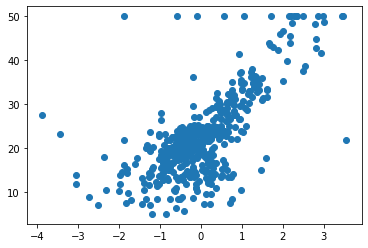

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X[:,5],Y)

In [55]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.3)

## Linear Regression on Mutliple Features

In [54]:
# X - Matrix(m*n)
# x - single example, single row with n features
# Hypothesis - prediction of one row
# predict - prediction of whole dataset

def hypothesis(x,m):
  y_ = 0.0
  N = x.shape[0]
  for i in range(N):
    y_ += m[i]*x[i]
  return y_

def error(X,Y,m):
  e = 0.0
  M = X.shape[0]
  for j in range(M):
    y_ = hypothesis(X[j],m)
    e += (Y[j]-y_)**2
  return e/M

def gradient(X,Y,m):
  M,N = X.shape
  grad = np.zeros((N,))
  for j in range(N):
    for i in range(M):
      y_ = hypothesis(X[i],m)
      grad[j] += (y_ - Y[i])*X[i][j]
  
  return grad/M

def gradient_descent(X,Y,lr = 0.1,max_iter = 300):
  M,N = X.shape
  m = np.zeros((N,))
  error_list = []

  for i in range(max_iter):
    e = error(X,Y,m)
    print(i, " Cost: ", e)
    error_list.append(e)

    grad = gradient(X,Y,m)
    for j in range(N):
      m[j] = m[j] - lr*grad[j]

  return m,error_list

In [61]:
def predict(X_test,m):
  Y_ = []
  M = X_test.shape[0]
  for j in range(M):
    pred = hypothesis(X_test[j],m)
    Y_.append(pred)
  return np.array(Y_)

def score(Y_truth, Y_pred):
  u = ((Y_truth - Y_pred)**2).sum()
  v = ((Y_truth - Y_truth.mean())**2).sum()
  return 1 - u/v

In [57]:
import time
start = time.time()
m,error_list = gradient_descent(X_train,Y_train)
end = time.time()
print(f"Time take is {end-start}")

0  Cost:  586.7866666666669
1  Cost:  463.83221982229725
2  Cost:  376.49482115374377
3  Cost:  308.10712818185544
4  Cost:  253.37391009539556
5  Cost:  209.34039314922495
6  Cost:  173.85133623735612
7  Cost:  145.21809126497456
8  Cost:  122.09571994921421
9  Cost:  103.40825453214828
10  Cost:  88.29322886161613
11  Cost:  76.0583751174799
12  Cost:  66.14739583531072
13  Cost:  58.112795430139364
14  Cost:  51.59426316047446
15  Cost:  46.30143996886008
16  Cost:  42.000156571462874
17  Cost:  38.501426417586146
18  Cost:  35.65262949099815
19  Cost:  33.3304417035714
20  Cost:  31.435157542316762
21  Cost:  29.886126524420114
22  Cost:  28.618081364061137
23  Cost:  27.578180993125503
24  Cost:  26.723627350931878
25  Cost:  26.019743211282925
26  Cost:  25.438420835495123
27  Cost:  24.95686916285893
28  Cost:  24.55660153980431
29  Cost:  24.22261740138492
30  Cost:  23.94274044694635
31  Cost:  23.7070831633894
32  Cost:  23.5076134133165
33  Cost:  23.337803513662006
34  Cost

In [58]:
print(m)

[-0.93737274  0.96641658  0.07792085  0.73307693 -2.59358528  2.47345195
  0.31205607 -3.27602913  2.23480226 -1.15537346 -2.26675759  0.85016747
 -4.0404237  22.54529776]


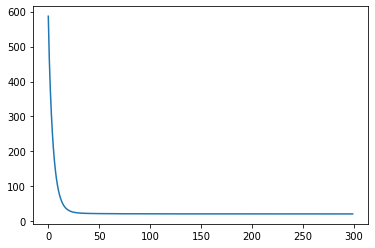

In [59]:
plt.plot(error_list)

In [62]:
Y_pred = predict(X_test,m)
score(Y_test,Y_pred)

0.7132810521829651

## Linear Regression Using Vectorization - Faster

In [63]:
# X - Matrix(m*n)
# x - single example, single row with n features
# predict - prediction of whole dataset

def predict(X,m):
  return np.dot(X,m)

def error(X,Y,m):
  M = X.shape[0]
  Y_ = predict(X,m)
  e = ((Y - Y_)**2).sum()
  return e/M

def gradient(X,Y,m):
  M = X.shape[0]
  Y_ = predict(X,m)
  grad = np.dot(X.T,(Y_-Y))
  return grad/M

def gradient_descent(X,Y,lr = 0.1,max_iter = 300):
  M,N = X.shape
  m = np.zeros((N,))
  error_list = []

  for i in range(max_iter):
    e = error(X,Y,m)
    print(i, " Cost: ", e)
    error_list.append(e)

    grad = gradient(X,Y,m)
    m = m - lr*grad

  return m,error_list

In [64]:
import time
start = time.time()
m,error_list = gradient_descent(X_train,Y_train)
end = time.time()
print(f"Time take is {end-start}")

0  Cost:  586.7866666666666
1  Cost:  463.8322198222978
2  Cost:  376.4948211537435
3  Cost:  308.1071281818554
4  Cost:  253.37391009539562
5  Cost:  209.34039314922478
6  Cost:  173.85133623735604
7  Cost:  145.21809126497465
8  Cost:  122.0957199492143
9  Cost:  103.40825453214835
10  Cost:  88.29322886161607
11  Cost:  76.05837511747995
12  Cost:  66.14739583531076
13  Cost:  58.11279543013939
14  Cost:  51.59426316047448
15  Cost:  46.301439968860045
16  Cost:  42.00015657146286
17  Cost:  38.501426417586174
18  Cost:  35.65262949099817
19  Cost:  33.330441703571445
20  Cost:  31.43515754231675
21  Cost:  29.8861265244201
22  Cost:  28.618081364061137
23  Cost:  27.578180993125514
24  Cost:  26.72362735093192
25  Cost:  26.01974321128295
26  Cost:  25.43842083549516
27  Cost:  24.956869162858943
28  Cost:  24.556601539804337
29  Cost:  24.222617401384927
30  Cost:  23.942740446946324
31  Cost:  23.70708316338938
32  Cost:  23.50761341331649
33  Cost:  23.337803513662013
34  Cost: 

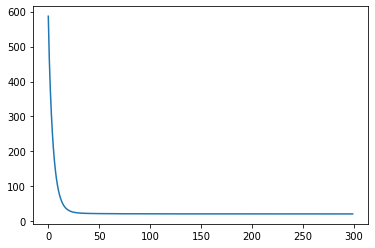

In [66]:
plt.plot(error_list);

In [65]:
Y_pred = predict(X_test,m)
score(Y_test,Y_pred)

0.7132810521829651